In [1]:
# Import Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Datasets
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
transactions = pd.read_csv(transactions_url)

In [3]:
# Data Preprocessing: Merge Customers and Transactions
merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")

In [4]:
# ------------------------------
# Feature Engineering
# ------------------------------

# Total Spending Per Customer
customer_spending = (
    merged_data.groupby("CustomerID")["TotalValue"]
    .sum()
    .reset_index()
    .rename(columns={"TotalValue": "TotalSpending"})
)

# Average Transaction Value
avg_transaction_value = (
    merged_data.groupby("CustomerID")["TotalValue"]
    .mean()
    .reset_index()
    .rename(columns={"TotalValue": "AvgTransactionValue"})
)

# Total Transactions Per Customer
total_transactions = (
    merged_data.groupby("CustomerID")["TransactionID"]
    .count()
    .reset_index()
    .rename(columns={"TransactionID": "TotalTransactions"})
)

In [5]:
# Merge Features into Customer Profile
customer_features = pd.merge(customer_spending, avg_transaction_value, on="CustomerID")
customer_features = pd.merge(customer_features, total_transactions, on="CustomerID")

In [6]:
# Standardize Features for Clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])


In [7]:
# ------------------------------
# K-Means Clustering
# ------------------------------

# Set Range of Clusters (2 to 10)
range_n_clusters = list(range(2, 11))
best_db_index = float('inf')
best_kmeans = None
best_n_clusters = None

# Calculate Clusters for Each n_clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)

    # Calculate Metrics
    db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
    silhouette = silhouette_score(scaled_features, kmeans.labels_)

    if db_index < best_db_index:
        best_db_index = db_index
        best_kmeans = kmeans
        best_n_clusters = n_clusters

    print(f"Clusters: {n_clusters}, DB Index: {db_index:.4f}, Silhouette: {silhouette:.4f}")

# Best KMeans Model and Number of Clusters
print(f"Best Number of Clusters: {best_n_clusters}, DB Index: {best_db_index:.4f}")


Clusters: 2, DB Index: 1.0072, Silhouette: 0.3802
Clusters: 3, DB Index: 0.9578, Silhouette: 0.3603
Clusters: 4, DB Index: 1.0604, Silhouette: 0.3135
Clusters: 5, DB Index: 0.8525, Silhouette: 0.3535
Clusters: 6, DB Index: 0.8694, Silhouette: 0.3393
Clusters: 7, DB Index: 0.8553, Silhouette: 0.3390
Clusters: 8, DB Index: 0.9125, Silhouette: 0.3430
Clusters: 9, DB Index: 0.8848, Silhouette: 0.3429
Clusters: 10, DB Index: 0.8630, Silhouette: 0.3497
Best Number of Clusters: 5, DB Index: 0.8525


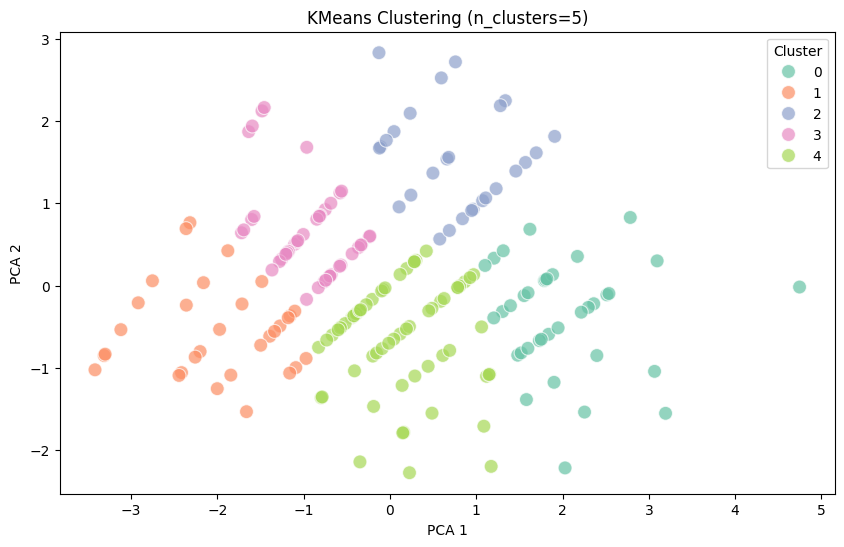

In [8]:
# ------------------------------
# Visualizing the Clusters
# ------------------------------

# Apply PCA for 2D Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=best_kmeans.labels_, palette="Set2", s=100, alpha=0.7)
plt.title(f"KMeans Clustering (n_clusters={best_n_clusters})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

In [9]:
# ------------------------------
# Save Clustering Results
# ------------------------------

# Add Cluster Labels to Customer Data
customer_features["Cluster"] = best_kmeans.labels_

# Save the Results
customer_features.to_csv("Clustered_Customers.csv", index=False)

print("Clustering complete. Results saved to 'Clustered_Customers.csv'.")

Clustering complete. Results saved to 'Clustered_Customers.csv'.


In [13]:
from IPython.display import FileLink

print("Check Files for Downloading Clustered_Customers.csv")
# Generate the download link for the CSV
FileLink(r'Clustered_Customers.csv')


Check Files for Downloading Clustered_Customers.csv


/content/Clustered_Customers.csv